In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
df = pd.read_csv("GLOBALSUPERSTORE_DATA -DUPLICATE1.csv")

In [3]:
# We start by Exploring the data
# Generate the first five rows
df.head()

,ROW_ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,40098,CA-2014-AB10015140-41954,11/11/2014,11/13/2014,First Class,AB-100151402,Aaron Bergman,Consumer,Oklahoma City,Oklahoma,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2.0,0.0,62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2/5/2014,2/7/2014,Second Class,JR-162107,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9.0,0.1,-288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/2014,10/18/2014,First Class,CR-127307,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-5356,Technology,Phones,NaN,5175.17,9.0,0.1,919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,1/28/2014,1/30/2014,First Class,KM-1637548,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5.0,0.1,-96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,11/5/2014,11/6/2014,Same Day,RH-9495111,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8.0,0.0,311.52,903.04,Critical


In [4]:
#Check the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ROW_ID          24 non-null     object 
 1   Order ID        24 non-null     object 
 2   Order Date      14 non-null     object 
 3   Ship Date       14 non-null     object 
 4   Ship Mode       14 non-null     object 
 5   Customer ID     14 non-null     object 
 6   Customer Name   14 non-null     object 
 7   Segment         14 non-null     object 
 8   City            14 non-null     object 
 9   State           14 non-null     object 
 10  Country         14 non-null     object 
 11  Region          14 non-null     object 
 12  Market          14 non-null     object 
 13  Product ID      14 non-null     object 
 14  Category        14 non-null     object 
 15  Sub-Category    14 non-null     object 
 16  Product Name    13 non-null     object 
 17  Sales           14 non-null     float

In [5]:
#Check the datatypes of the columns
df.dtypes

ROW_ID             object
Order ID           object
Order Date         object
Ship Date          object
Ship Mode          object
Customer ID        object
Customer Name      object
Segment            object
City               object
State              object
Country            object
Region             object
Market             object
Product ID         object
Category           object
Sub-Category       object
Product Name       object
Sales             float64
Quantity          float64
Discount          float64
Profit            float64
Shipping Cost     float64
Order Priority     object
dtype: object

In [6]:
#Checking for the count of missing values in each column
df.isnull().sum()

ROW_ID             1
Order ID           1
Order Date        11
Ship Date         11
Ship Mode         11
Customer ID       11
Customer Name     11
Segment           11
City              11
State             11
Country           11
Region            11
Market            11
Product ID        11
Category          11
Sub-Category      11
Product Name      12
Sales             11
Quantity          11
Discount          11
Profit            11
Shipping Cost     11
Order Priority    11
dtype: int64

In [7]:
#Computing statistics
df.describe()

,Sales,Quantity,Discount,Profit,Shipping Cost
count,14.000000,14.000000,14.000000,14.000000,14.000000
mean,2473.938571,5.000000,0.042857,408.482143,634.465000
std,1831.926361,2.572039,0.064621,458.556490,404.482444
min,17.940000,1.000000,0.000000,-288.770000,4.290000
25%,711.990000,3.250000,0.000000,17.787500,233.140000
50%,2724.960000,5.000000,0.000000,438.180000,856.975000
75%,3505.177500,6.750000,0.100000,734.347500,901.617500
max,5244.840000,9.000000,0.200000,1151.400000,923.630000


In [8]:
# Handle missing values
#Checking percentage of missing values
missing_percentage = df.isnull().sum() / len(df) * 100
missing_percentage

ROW_ID             4.0
Order ID           4.0
Order Date        44.0
Ship Date         44.0
Ship Mode         44.0
Customer ID       44.0
Customer Name     44.0
Segment           44.0
City              44.0
State             44.0
Country           44.0
Region            44.0
Market            44.0
Product ID        44.0
Category          44.0
Sub-Category      44.0
Product Name      48.0
Sales             44.0
Quantity          44.0
Discount          44.0
Profit            44.0
Shipping Cost     44.0
Order Priority    44.0
dtype: float64

In [9]:
#Check the number of rows
len(df)

25

In [10]:
# Fill the missing values
df['ROW_ID'].fillna('Uknown', inplace=True)
df['Order ID'].fillna('Uknown', inplace=True)

In [11]:
# Fill the missing values
df['Customer ID'].fillna('Uknown', inplace=True)
df['Product ID'].fillna('Uknown', inplace=True)
df['Ship Mode'].fillna('Uknown', inplace=True)

In [12]:
df['Order Date'].fillna(df['Order Date'].mode()[0],inplace=True)
df['Ship Date'].fillna(df['Ship Date'].mode()[0],inplace=True)

In [13]:
cat_cols = ["Customer Name","Segment","City","State","Country",
            "Region","Market","Category","Sub-Category",
            "Product Name","Order Priority"]

for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [14]:
# For this columns we fill with median
num_cols = ["Sales","Quantity","Discount","Profit","Shipping Cost"]

for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

In [15]:
df.isnull().sum()

ROW_ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
City              0
State             0
Country           0
Region            0
Market            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order Priority    0
dtype: int64

In [16]:
#Convert Order date and Ship Date to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ROW_ID          25 non-null     object        
 1   Order ID        25 non-null     object        
 2   Order Date      25 non-null     datetime64[ns]
 3   Ship Date       25 non-null     object        
 4   Ship Mode       25 non-null     object        
 5   Customer ID     25 non-null     object        
 6   Customer Name   25 non-null     object        
 7   Segment         25 non-null     object        
 8   City            25 non-null     object        
 9   State           25 non-null     object        
 10  Country         25 non-null     object        
 11  Region          25 non-null     object        
 12  Market          25 non-null     object        
 13  Product ID      25 non-null     object        
 14  Category        25 non-null     object        
 15  Sub-Cate

In [18]:
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ROW_ID          25 non-null     object        
 1   Order ID        25 non-null     object        
 2   Order Date      25 non-null     datetime64[ns]
 3   Ship Date       25 non-null     datetime64[ns]
 4   Ship Mode       25 non-null     object        
 5   Customer ID     25 non-null     object        
 6   Customer Name   25 non-null     object        
 7   Segment         25 non-null     object        
 8   City            25 non-null     object        
 9   State           25 non-null     object        
 10  Country         25 non-null     object        
 11  Region          25 non-null     object        
 12  Market          25 non-null     object        
 13  Product ID      25 non-null     object        
 14  Category        25 non-null     object        
 15  Sub-Cate

In [20]:
#Check for invalid dates
df['Ship Date'].isnull().sum()
df['Order Date'].isnull().sum()

0

In [21]:
#Clean Numeric columns
numeric_columns = ['Sales','Quantity','Discount','Profit','Shipping Cost']
df[numeric_columns].head()

,Sales,Quantity,Discount,Profit,Shipping Cost
0,221.98,2.0,0.0,62.15,40.77
1,3709.40,9.0,0.1,-288.77,923.63
2,5175.17,9.0,0.1,919.97,915.49
3,2892.51,5.0,0.1,-96.54,910.16
4,2832.96,8.0,0.0,311.52,903.04


In [22]:
df.head()

,ROW_ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,Oklahoma City,Oklahoma,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2.0,0.0,62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9.0,0.1,-288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-5356,Technology,Phones,"Bevis Conference Table, Fully Assembled",5175.17,9.0,0.1,919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5.0,0.1,-96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8.0,0.0,311.52,903.04,Critical


In [23]:
#Check for duplicates
df.duplicated().sum()

0

In [24]:
# Create fields 
df['Delivery Days'] = (df['Ship Date'] - df['Order Date']).dt.days

In [25]:
#Check if the column was created
df.head()

,ROW_ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Delivery Days
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,Oklahoma City,Oklahoma,...,Technology,Phones,Samsung Convoy 3,221.98,2.0,0.0,62.15,40.77,High,2
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,Wollongong,New South Wales,...,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9.0,0.1,-288.77,923.63,Critical,2
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,Brisbane,Queensland,...,Technology,Phones,"Bevis Conference Table, Fully Assembled",5175.17,9.0,0.1,919.97,915.49,Medium,1
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,Berlin,Berlin,...,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5.0,0.1,-96.54,910.16,Medium,2
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,Dakar,Dakar,...,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8.0,0.0,311.52,903.04,Critical,1


In [26]:
#Create a profit margin column
df['Profit Margin'] = (df['Profit']/df['Sales']) * 100

In [27]:
df.head(2)

,ROW_ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Delivery Days,Profit Margin
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,Oklahoma City,Oklahoma,...,Phones,Samsung Convoy 3,221.98,2.0,0.0,62.15,40.77,High,2,27.998018
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,Wollongong,New South Wales,...,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9.0,0.1,-288.77,923.63,Critical,2,-7.784817


In [28]:
# Create order value categories
df['Order_Value_Category'] = pd.cut(df['Sales'], 
                                   bins=[0, 100, 500, 1000, float('inf')],
                                   labels=['Low (≤$100)', 'Medium ($100-$500)', 
                                          'High ($500-$1000)', 'Premium (>$1000)'])

In [29]:
df.head()

,ROW_ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Delivery Days,Profit Margin,Order_Value_Category
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,Oklahoma City,Oklahoma,...,Samsung Convoy 3,221.98,2.0,0.0,62.15,40.77,High,2,27.998018,Medium ($100-$500)
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,Wollongong,New South Wales,...,"Novimex Executive Leather Armchair, Black",3709.40,9.0,0.1,-288.77,923.63,Critical,2,-7.784817,Premium (>$1000)
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,Brisbane,Queensland,...,"Bevis Conference Table, Fully Assembled",5175.17,9.0,0.1,919.97,915.49,Medium,1,17.776614,Premium (>$1000)
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,Berlin,Berlin,...,"Motorola Smart Phone, Cordless",2892.51,5.0,0.1,-96.54,910.16,Medium,2,-3.337586,Premium (>$1000)
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,Dakar,Dakar,...,"Sharp Wireless Fax, High-Speed",2832.96,8.0,0.0,311.52,903.04,Critical,1,10.996272,Premium (>$1000)


In [30]:
#Extract date components for time analysis
df['Order_Year'] = df['Order Date'].dt.year
df['Order_Month'] = df['Order Date'].dt.month_name()
df['Order_Quarter'] = df['Order Date'].dt.quarter
df['Order_Day_of_week'] = df['Order Date'].dt.day_name()

In [35]:
#Extract date components for time analysis
df['Ship_Year'] = df['Ship Date'].dt.year
df['Ship_Month'] = df['Ship Date'].dt.month_name()
df['Ship_Quarter'] = df['Ship Date'].dt.quarter
df['Shipping_Day_of_week'] = df['Ship Date'].dt.day_name()

In [36]:
df.head()

,ROW_ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Profit Margin,Order_Value_Category,Order_Year,Order_Month,Order_Quarter,Order_Day_of_week,Ship_Year,Ship_Month,Ship_Quarter,Shipping_Day_of_week
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,Oklahoma City,Oklahoma,...,27.998018,Medium ($100-$500),2014,November,4,Thursday,2014,November,4,Thursday
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,Wollongong,New South Wales,...,-7.784817,Premium (>$1000),2014,February,1,Friday,2014,February,1,Friday
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,Brisbane,Queensland,...,17.776614,Premium (>$1000),2014,October,4,Saturday,2014,October,4,Saturday
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,Berlin,Berlin,...,-3.337586,Premium (>$1000),2014,January,1,Thursday,2014,January,1,Thursday
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,Dakar,Dakar,...,10.996272,Premium (>$1000),2014,November,4,Thursday,2014,November,4,Thursday


In [40]:
#Top Customers by sales
top_customers = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False)
top_customers

Customer Name
Aaron Bergman       30605.15
Mick Brown           5244.84
Craig Reiter         5175.17
Anthony Jacobs       4626.15
Justin Ritter        3709.40
Katherine Murray     2892.51
Jim Mitchum          2862.68
Rick Hansen          2832.96
Magdelene Morse      2616.96
Vicky Freymann       2221.80
Toby Swindell        1822.08
Name: Sales, dtype: float64

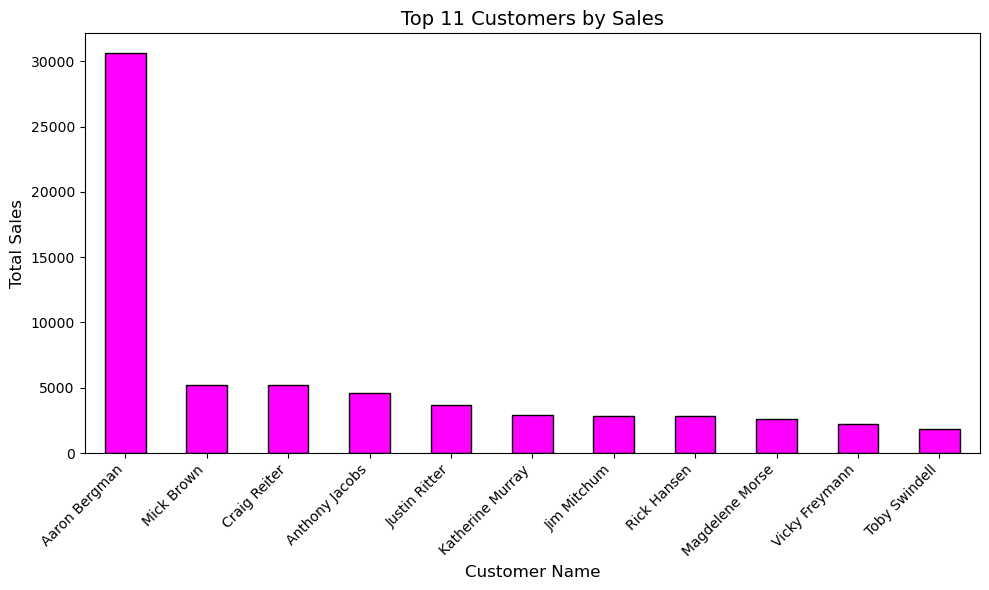

In [42]:
# Visualize the top customers by sales using a bar chart
plt.figure(figsize=(10,6))
top_customers.plot(kind="bar", color="magenta", edgecolor="black")

plt.title("Top 11 Customers by Sales", fontsize=14)
plt.xlabel("Customer Name", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show();

In [46]:
#Sales by Region
sales_region = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
sales_region

Region
Oceania           48788.73
Southern Asia      4626.15
Western Europe     2892.51
Western Africa     2832.96
Western Asia       2616.96
South America      2221.80
Central US          563.94
Western US           66.65
Name: Sales, dtype: float64

In [51]:
#Sales by Market
market_sales = df.groupby('Market')['Sales'].sum().sort_values(ascending=False)
market_sales

Market
Asia Pacific    56031.84
Europe           2892.51
Africa           2832.96
LATAM            2221.80
USCA              630.59
Name: Sales, dtype: float64

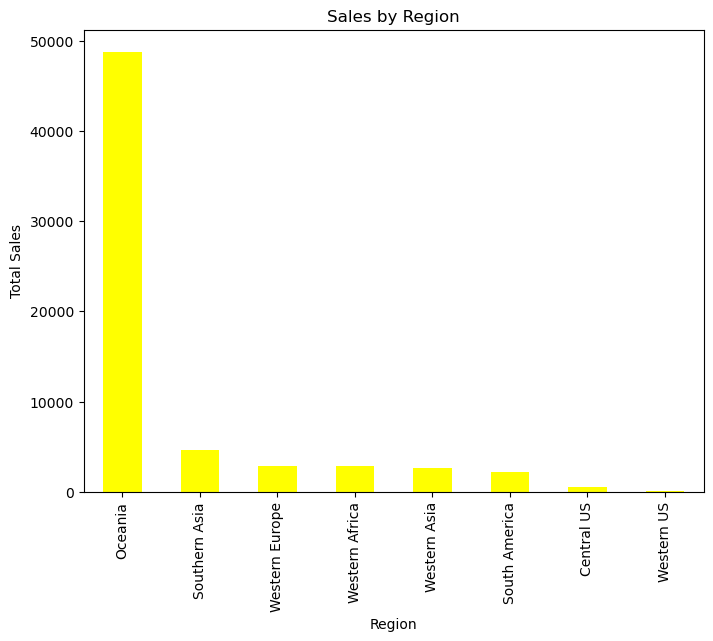

In [50]:
#Sales by Region(Bar chart)
sales_region.plot(kind='bar', color='Yellow', figsize=(8,6))
plt.title('Sales by Region')
plt.ylabel('Total Sales')
plt.show();

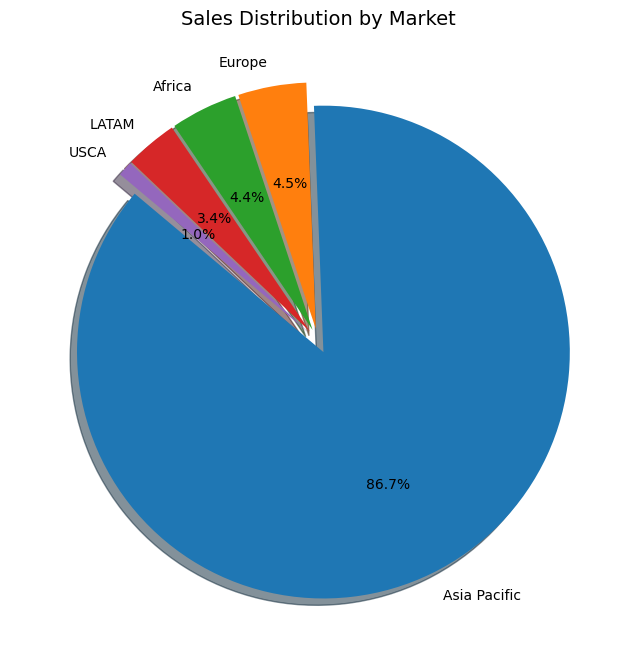

In [66]:
# Pie chart visualization on pie chart
# Create explode list with same length as markets
explode = [0.05] * len(market_sales)   # all slices slightly separated

# Plot pie chart
plt.figure(figsize=(8,8))
plt.pie(
    market_sales, 
    labels=market_sales.index, 
    autopct="%1.1f%%", 
    startangle=140, 
    shadow=True,
    explode=explode
)

plt.title("Sales Distribution by Market", fontsize=14)
plt.show()

In [74]:
#Sales vs Profit Analysis
df.groupby('Category')[['Sales','Profit']].sum()

,Sales,Profit
Category,,
Furniture,47989.50,7422.29
Office Supplies,17.94,4.66
Technology,16602.26,3111.78


In [75]:
df.groupby('Sub-Category')[['Sales','Profit']].sum()

,Sales,Profit
Sub-Category,,
Art,17.94,4.66
Bookcases,341.96,54.71
Chairs,7801.99,903.57
Copiers,2832.96,311.52
Phones,43743.86,7620.24
Tables,9870.99,1644.03


In [71]:
#order priority impact
df.groupby('Order Priority')['Sales'].sum()

Order Priority
Critical    46040.44
High        10501.58
Medium       8067.68
Name: Sales, dtype: float64

In [73]:
df.groupby('Order Priority')['Profit'].sum()

Order Priority
Critical    7944.27
High        1771.03
Medium       823.43
Name: Profit, dtype: float64

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ROW_ID                25 non-null     object        
 1   Order ID              25 non-null     object        
 2   Order Date            25 non-null     datetime64[ns]
 3   Ship Date             25 non-null     datetime64[ns]
 4   Ship Mode             25 non-null     object        
 5   Customer ID           25 non-null     object        
 6   Customer Name         25 non-null     object        
 7   Segment               25 non-null     object        
 8   City                  25 non-null     object        
 9   State                 25 non-null     object        
 10  Country               25 non-null     object        
 11  Region                25 non-null     object        
 12  Market                25 non-null     object        
 13  Product ID            

In [78]:
#Monthly/yearly Trends
df["Order_Year"] = df["Order Date"].dt.year
df["Order_Month"] = df["Order Date"].dt.month_name()

sales_by_year = df.groupby("Order_Year")["Sales"].sum()
sales_by_month = df.groupby("Order_Month")["Sales"].sum()

In [83]:
sales_by_year

Order_Year
2012     4505.69
2013    12092.79
2014    48011.22
Name: Sales, dtype: float64

In [89]:
sales_by_month.nlargest(12)

Order_Month
November    37415.34
April        9870.99
October      5175.17
February     3709.40
January      2892.51
June         2862.68
December     2616.96
March          66.65
Name: Sales, dtype: float64

In [93]:
#Discount impact on profit
df.groupby('Discount')[['Sales','Profit']].mean().head(10)

,Sales,Profit
Discount,,
0.0,2496.0615,461.7655
0.1,3659.9400,324.4850
0.2,48.7100,5.4800


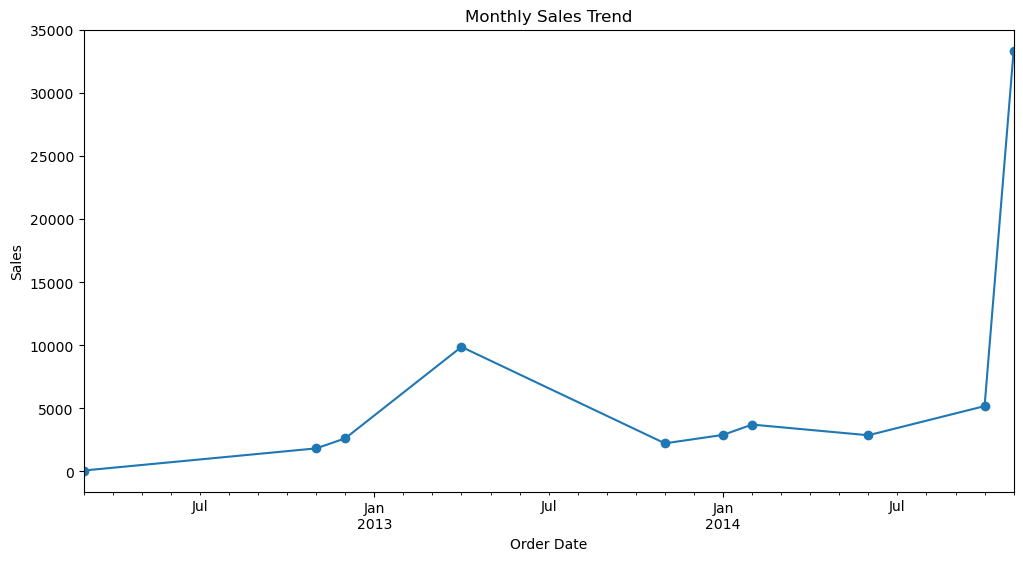

In [94]:
sales_by_month = df.groupby(df["Order Date"].dt.to_period("M"))["Sales"].sum()
sales_by_month.plot(kind="line", figsize=(12,6), marker="o")
plt.title("Monthly Sales Trend")
plt.ylabel("Sales")
plt.show()

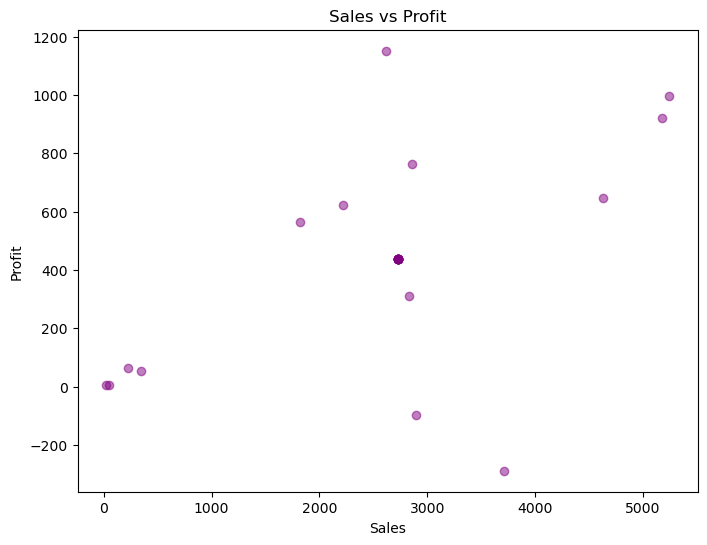

In [95]:
plt.figure(figsize=(8,6))
plt.scatter(df["Sales"], df["Profit"], alpha=0.5, color="purple")
plt.title("Sales vs Profit")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.show()

In [98]:
save_path = r"C:\Users\njeri\OneDrive\Documents\SCHOOL-BDS\1.2\Principles Of Data Science\Dataset\cleaned_sales_data.csv"
df.to_csv(save_path, index=False)